In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# SubwayDelays.csv
subway_df = pd.read_csv('../data/final/final.csv')
print(subway_df['Code'].value_counts())

Code
SUDP     11676
MUIS      9731
SUO       7360
MUPAA     6101
MUIRS     4735
         ...  
MRSTM        1
PRSP         1
ERHV         1
EUTAC        1
PUCBI        1
Name: count, Length: 198, dtype: int64


In [4]:
subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
1,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
3,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
4,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781


In [5]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96873 entries, 0 to 96872
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       96873 non-null  object
 1   Time       96873 non-null  object
 2   Day        96873 non-null  object
 3   Station    96873 non-null  object
 4   Code       96873 non-null  object
 5   Min Delay  96873 non-null  int64 
 6   Min Gap    96873 non-null  int64 
 7   Bound      63814 non-null  object
 8   Line       96675 non-null  object
 9   Vehicle    96873 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 7.4+ MB


In [6]:
subway_df['Date'] = pd.to_datetime(subway_df['Date'])
subway_df['DayOfWeek'] = subway_df['Date'].dt.dayofweek
subway_df['Month'] = subway_df['Date'].dt.month
subway_df['Year'] = subway_df['Date'].dt.year
subway_df['Hour'] = pd.to_datetime(subway_df['Time'], format='%H:%M', errors='coerce').dt.hour
subway_df['IsWeekend'] = (subway_df['DayOfWeek'] >= 5).astype(int)
subway_df['IsRushHour'] = subway_df['Hour'].isin([7, 8, 9, 17, 18]).astype(int)

In [7]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96873 entries, 0 to 96872
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96873 non-null  datetime64[ns]
 1   Time        96873 non-null  object        
 2   Day         96873 non-null  object        
 3   Station     96873 non-null  object        
 4   Code        96873 non-null  object        
 5   Min Delay   96873 non-null  int64         
 6   Min Gap     96873 non-null  int64         
 7   Bound       63814 non-null  object        
 8   Line        96675 non-null  object        
 9   Vehicle     96873 non-null  int64         
 10  DayOfWeek   96873 non-null  int32         
 11  Month       96873 non-null  int32         
 12  Year        96873 non-null  int32         
 13  Hour        96873 non-null  int32         
 14  IsWeekend   96873 non-null  int64         
 15  IsRushHour  96873 non-null  int64         
dtypes: datetime64[ns](1), 

In [8]:
subway_df.sample(10)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,DayOfWeek,Month,Year,Hour,IsWeekend,IsRushHour
896,2018-01-15,15:56,Monday,SHERBOURNE STATION,MUPAA,0,0,E,BD,5048,0,1,2018,15,0,0
78807,2025-02-15,08:44,Saturday,KENNEDY BD STATION,SUDP,3,8,W,BD,5129,5,2,2025,8,1,1
4446,2020-01-17,19:56,Friday,VAUGHAN MC STATION,MUPAA,0,0,S,YU,5856,4,1,2020,19,0,0
5770,2021-01-18,20:26,Monday,YONGE BD STATION,SUDP,0,0,E,BD,5143,0,1,2021,20,0,0
20443,2022-09-17,13:36,Saturday,OLD MILL STATION,TUOS,3,7,E,BD,5336,5,9,2022,13,1,0
67345,2024-09-10,18:04,Tuesday,BLOOR STATION,MUPAA,0,0,N,YU,6021,1,9,2024,18,0,1
53466,2024-02-29,19:47,Thursday,BLOOR STATION,MUIRS,0,0,NaN,YU,0,3,2,2024,19,0,0
94871,2025-10-01,14:13,Wednesday,DUNDAS STATION,MUIRS,0,0,NaN,YU,0,2,10,2025,14,0,0
10032,2022-03-04,15:50,Friday,EGLINTON STATION,TUATC,3,6,S,YU,5626,4,3,2022,15,0,0
16873,2022-07-11,19:36,Monday,WARDEN STATION,SUDP,5,12,E,BD,5013,0,7,2022,19,0,0


In [9]:
subway_df['HasDelay'] = (subway_df['Min Delay'] > 0).astype(int) # has a delay if the length of the delay is greater than 0

In [10]:
subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,DayOfWeek,Month,Year,Hour,IsWeekend,IsRushHour,HasDelay
0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,0,1,2018,0,0,0,1
1,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,0,1,2018,1,0,0,0
2,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751,0,1,2018,1,0,0,0
3,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222,0,1,2018,1,0,0,0
4,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,0,1,2018,1,0,0,1


In [11]:
subway_df['HourBin'] = pd.cut(subway_df['Hour'], bins=[0, 6, 10, 16, 19, 24], labels=['Night', 'Morning', 'Midday', 'Evening', 'Late'], include_lowest=True) # feature grouping hours by time of day
subway_df['RushHour_Weekday'] = subway_df['IsRushHour'] * (1 - subway_df['IsWeekend']) # feature, if rushhour + weekend
subway_df['Weekend_Morning'] = subway_df['IsWeekend'] * (subway_df['Hour'] < 12).astype(int) # feature, if weekend + morning
subway_df['Season'] = subway_df['Month'].apply(lambda x: 0 if x in [12, 1, 2] else 1 if x in [3, 4, 5] else 2 if x in [6, 7, 8] else 3) # feature grouping months by seasons

In [12]:
subway_df.sample(10) # we need MORE features!!

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Month,Year,Hour,IsWeekend,IsRushHour,HasDelay,HourBin,RushHour_Weekday,Weekend_Morning,Season
85284,2025-05-17,21:40,Saturday,MAIN STREET STATION,MUIS,0,0,NaN,BD,0,...,5,2025,21,1,0,0,Late,0,0,1
42221,2023-09-16,10:11,Saturday,COLLEGE STATION,SUDP,3,9,S,YU,5821,...,9,2023,10,1,0,1,Morning,0,1,3
28708,2023-02-11,14:40,Saturday,BAY STATION,MUIS,0,0,NaN,BD,0,...,2,2023,14,1,0,0,Midday,0,0,0
79878,2025-02-27,12:11,Thursday,DUNDAS STATION,MUIS,0,0,S,YU,0,...,2,2025,12,0,0,0,Midday,0,0,0
7762,2022-01-25,08:33,Tuesday,KIPLING STATION,PUSIS,0,0,E,BD,5147,...,1,2022,8,0,1,0,Morning,1,0,0
72400,2024-11-19,07:48,Tuesday,DUPONT STATION,MUIRS,0,0,S,YU,0,...,11,2024,7,0,1,0,Morning,1,0,3
15238,2022-06-09,18:09,Thursday,EGLINTON STATION,MUPAA,0,0,N,YU,5931,...,6,2022,18,0,1,0,Evening,1,0,2
25673,2022-12-22,08:24,Thursday,CASTLE FRANK STATION,MUIR,7,10,W,BD,5121,...,12,2022,8,0,1,1,Morning,1,0,0
52070,2024-02-10,22:05,Saturday,WILSON STATION,PUTDN,3,9,N,YU,5476,...,2,2024,22,1,0,1,Late,0,0,0
85892,2025-05-27,11:58,Tuesday,WELLESLEY STATION,SUDP,0,0,NaN,YU,0,...,5,2025,11,0,0,0,Midday,0,0,1


In [13]:
# CYCLICAL ENCODING (so model knows hour 23 is close to hour 0)
subway_df['Hour_sin'] = np.sin(2 * np.pi * subway_df['Hour'] / 24)
subway_df['Hour_cos'] = np.cos(2 * np.pi * subway_df['Hour'] / 24)
subway_df['DayOfWeek_sin'] = np.sin(2 * np.pi * subway_df['DayOfWeek'] / 7)
subway_df['DayOfWeek_cos'] = np.cos(2 * np.pi * subway_df['DayOfWeek'] / 7) # basically plots hours and days of week relative to sin/cos, so the ends meet and are less "different".

In [14]:
subway_df.sample(10) # observe how entry 17144 (1) and 96860(7) are similar!

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,IsRushHour,HasDelay,HourBin,RushHour_Weekday,Weekend_Morning,Season,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos
23541,2022-11-14,00:13,Monday,DUFFERIN STATION,MUIS,0,0,NaN,BD,0,...,0,0,Night,0,0,3,0.000000,1.000000e+00,0.000000,1.000000
85033,2025-05-14,18:25,Wednesday,LANSDOWNE STATION,MUNCA,0,0,NaN,BD,0,...,1,0,Evening,1,0,1,-1.000000,-1.836970e-16,0.974928,-0.222521
5151,2021-01-02,18:34,Saturday,VAUGHAN MC STATION,MUI,5,10,S,YU,5876,...,1,1,Evening,0,0,0,-1.000000,-1.836970e-16,-0.974928,-0.222521
77859,2025-02-03,07:38,Monday,OSGOODE STATION,MUO,5,8,S,YU,5641,...,1,1,Morning,1,0,0,0.965926,-2.588190e-01,0.000000,1.000000
54816,2024-03-20,09:37,Wednesday,KIPLING STATION,SUO,0,0,NaN,BD,0,...,1,0,Morning,1,0,1,0.707107,-7.071068e-01,0.974928,-0.222521
72520,2024-11-20,16:40,Wednesday,OSGOODE STATION,PUOPO,6,9,N,YU,6131,...,0,1,Midday,0,0,3,-0.866025,-5.000000e-01,0.974928,-0.222521
50681,2024-01-22,00:03,Monday,FINCH STATION,MUIR,6,12,NaN,YU,5576,...,0,1,Night,0,0,0,0.000000,1.000000e+00,0.000000,1.000000
90352,2025-08-01,09:00,Friday,DAVISVILLE STATION,MUNCA,0,0,NaN,YU,0,...,1,0,Morning,1,0,2,0.707107,-7.071068e-01,-0.433884,-0.900969
15894,2022-06-22,10:26,Wednesday,EGLINTON WEST STATION,PUOPO,8,10,S,YU,6116,...,0,1,Morning,0,0,2,0.500000,-8.660254e-01,0.974928,-0.222521
50056,2024-01-14,07:53,Sunday,SHEPPARD-YONGE STATION,PUTWZ,61,0,E,SHP,6166,...,1,1,Morning,0,1,0,0.965926,-2.588190e-01,-0.781831,0.623490


In [15]:
hour_delay_rate = subway_df.groupby('Hour')['HasDelay'].mean()
subway_df['Hour_DelayRate'] = subway_df['Hour'].map(hour_delay_rate) # mean of delay per hour

day_delay_rate = subway_df.groupby('DayOfWeek')['HasDelay'].mean()
subway_df['Day_DelayRate'] = subway_df['DayOfWeek'].map(day_delay_rate) # mean of delay per day of week

station_delay_rate = subway_df.groupby('Station')['HasDelay'].mean()
subway_df['Station_DelayRate'] = subway_df['Station'].map(station_delay_rate) # mean of delay per station

line_delay_rate = subway_df.groupby('Line')['HasDelay'].mean()
subway_df['Line_DelayRate'] = subway_df['Line'].map(line_delay_rate) # ... etc

code_delay_rate = subway_df.groupby('Code')['HasDelay'].mean()
subway_df['Code_DelayRate'] = subway_df['Code'].map(code_delay_rate)

In [16]:
subway_df.sample(10)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Season,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Hour_DelayRate,Day_DelayRate,Station_DelayRate,Line_DelayRate,Code_DelayRate
42758,2023-09-24,12:59,Sunday,SPADINA YUS STATION,SUAP,0,0,NaN,YU,0,...,3,1.224647e-16,-1.000000e+00,-0.781831,0.623490,0.365119,0.357971,0.413246,0.417092,0.283930
78853,2025-02-15,20:45,Saturday,CASTLE FRANK STATION,MUPAA,0,0,E,BD,5333,...,0,-8.660254e-01,5.000000e-01,-0.974928,-0.222521,0.375577,0.358368,0.405523,0.337941,0.467628
5718,2021-01-17,21:35,Sunday,QUEEN STATION,SUEAS,7,12,S,YU,5441,...,0,-7.071068e-01,7.071068e-01,-0.781831,0.623490,0.366446,0.357971,0.304413,0.417092,0.973684
85740,2025-05-24,20:30,Saturday,HIGHWAY 407 STATION,MUNCA,0,0,NaN,YU,0,...,1,-8.660254e-01,5.000000e-01,-0.974928,-0.222521,0.375577,0.358368,0.556082,0.417092,0.000000
45822,2023-11-12,18:21,Sunday,BLOOR STATION,MUIS,0,0,N,YU,0,...,3,-1.000000e+00,-1.836970e-16,-0.781831,0.623490,0.387534,0.357971,0.316756,0.417092,0.011612
88490,2025-07-06,09:15,Sunday,CASTLE FRANK STATION,MUIS,0,0,NaN,BD,0,...,2,7.071068e-01,-7.071068e-01,-0.781831,0.623490,0.386497,0.357971,0.405523,0.337941,0.011612
30596,2023-03-12,19:16,Sunday,DON MILLS STATION,MUIS,0,0,NaN,SHP,0,...,1,-9.659258e-01,2.588190e-01,-0.781831,0.623490,0.394579,0.357971,0.367861,0.368347,0.011612
31780,2023-03-30,13:58,Thursday,KENNEDY SRT STATION,ERTC,9,15,N,SRT,3011,...,1,-2.588190e-01,-9.659258e-01,0.433884,-0.900969,0.394330,0.375811,0.716049,0.468940,0.940397
32138,2023-04-03,23:15,Monday,DOWNSVIEW PARK STATION,SUO,0,0,NaN,YU,0,...,1,-2.588190e-01,9.659258e-01,0.000000,1.000000,0.313129,0.380773,0.526214,0.417092,0.243342
17996,2022-08-02,23:56,Tuesday,DON MILLS STATION,PUMEL,0,0,NaN,SHP,0,...,2,-2.588190e-01,9.659258e-01,0.781831,0.623490,0.313129,0.388081,0.367861,0.368347,0.002405


In [17]:
# CATEGORICAL FEATURES - One-hot encoding
# Get top 10 most common stations to avoid too many features, common stations are subject to more delays!
top_stations = subway_df['Station'].value_counts().head(10).index
subway_df['Station_Category'] = subway_df['Station'].apply(
    lambda x: x if x in top_stations else 'Other'
)

In [18]:
subway_df.sample(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Hour_DelayRate,Day_DelayRate,Station_DelayRate,Line_DelayRate,Code_DelayRate,Station_Category
61928,2024-06-25,18:11,Tuesday,FINCH STATION,PUMEL,0,0,NaN,YU,0,...,-1.000000,-1.836970e-16,0.781831,0.623490,0.387534,0.388081,0.394627,0.417092,0.002405,FINCH STATION
76347,2025-01-12,08:39,Sunday,GREENWOOD STATION,MUDD,6,10,E,BD,5353,...,0.866025,-5.000000e-01,-0.781831,0.623490,0.453414,0.357971,0.550102,0.337941,0.850490,Other
70794,2024-10-27,16:18,Sunday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,...,-0.866025,-5.000000e-01,-0.781831,0.623490,0.416590,0.357971,0.246245,0.417092,0.000000,DUNDAS STATION
93744,2025-09-12,23:14,Friday,SPADINA YUS STATION,SUO,0,0,NaN,YU,0,...,-0.258819,9.659258e-01,-0.433884,-0.900969,0.313129,0.388537,0.413246,0.417092,0.243342,Other
43280,2023-10-02,20:42,Monday,GLENCAIRN STATION,SUPOL,4,9,S,YU,5696,...,-0.866025,5.000000e-01,0.000000,1.000000,0.375577,0.380773,0.527426,0.417092,0.688889,Other


In [19]:
print(subway_df.isnull().sum()) # no null entries!

Date                     0
Time                     0
Day                      0
Station                  0
Code                     0
Min Delay                0
Min Gap                  0
Bound                33059
Line                   198
Vehicle                  0
DayOfWeek                0
Month                    0
Year                     0
Hour                     0
IsWeekend                0
IsRushHour               0
HasDelay                 0
HourBin                  0
RushHour_Weekday         0
Weekend_Morning          0
Season                   0
Hour_sin                 0
Hour_cos                 0
DayOfWeek_sin            0
DayOfWeek_cos            0
Hour_DelayRate           0
Day_DelayRate            0
Station_DelayRate        0
Line_DelayRate         198
Code_DelayRate           0
Station_Category         0
dtype: int64


In [20]:
subway_df = pd.get_dummies(subway_df, columns=['HourBin'], prefix='Time') #one hot encoding for time feature

In [21]:
subway_df.sample(10)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Day_DelayRate,Station_DelayRate,Line_DelayRate,Code_DelayRate,Station_Category,Time_Night,Time_Morning,Time_Midday,Time_Evening,Time_Late
75864,2025-01-05,11:23,Sunday,COLLEGE STATION,SUDP,0,0,N,YU,0,...,0.357971,0.329036,0.417092,0.400737,Other,False,False,True,False,False
95530,2025-10-11,18:22,Saturday,FINCH WEST STATION,MUIRS,0,0,NaN,YU,0,...,0.358368,0.408901,0.417092,0.019852,Other,False,False,False,True,False
92380,2025-08-22,18:09,Friday,KENNEDY BD STATION,MUSAN,4,7,W,BD,5359,...,0.388537,0.388090,0.337941,0.940883,KENNEDY BD STATION,False,False,False,True,False
23844,2022-11-19,12:45,Saturday,DONLANDS STATION,MUSAN,5,9,E,BD,5192,...,0.358368,0.482609,0.337941,0.940883,Other,False,False,True,False,False
3932,2020-01-06,10:14,Monday,JANE STATION,MUNCA,0,0,NaN,BD,0,...,0.380773,0.281212,0.337941,0.000000,Other,False,True,False,False,False
94114,2025-09-18,18:36,Thursday,LESLIE STATION,MUO,0,0,E,SHP,6191,...,0.375811,0.350090,0.368347,0.204852,Other,False,False,False,True,False
68545,2024-09-26,21:44,Thursday,CASTLE FRANK STATION,MUIRS,0,0,NaN,BD,0,...,0.375811,0.405523,0.337941,0.019852,Other,False,False,False,False,True
19138,2022-08-24,00:02,Wednesday,KENNEDY BD STATION,TUCC,0,0,NaN,BD,0,...,0.380978,0.388090,0.337941,0.730496,KENNEDY BD STATION,True,False,False,False,False
85100,2025-05-15,14:13,Thursday,ST CLAIR STATION,SUDP,4,8,N,YU,6021,...,0.375811,0.491416,0.417092,0.400737,Other,False,False,True,False,False
18981,2022-08-21,20:11,Sunday,SHEPPARD-YONGE STATION,SUO,12,17,E,SHP,6171,...,0.357971,0.406160,0.368347,0.243342,Other,False,False,False,False,True


In [22]:
print(f"Total features: {len(subway_df.columns)}")

Total features: 35


In [23]:
subway_df.columns

Index(['Date', 'Time', 'Day', 'Station', 'Code', 'Min Delay', 'Min Gap',
       'Bound', 'Line', 'Vehicle', 'DayOfWeek', 'Month', 'Year', 'Hour',
       'IsWeekend', 'IsRushHour', 'HasDelay', 'RushHour_Weekday',
       'Weekend_Morning', 'Season', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin',
       'DayOfWeek_cos', 'Hour_DelayRate', 'Day_DelayRate', 'Station_DelayRate',
       'Line_DelayRate', 'Code_DelayRate', 'Station_Category', 'Time_Night',
       'Time_Morning', 'Time_Midday', 'Time_Evening', 'Time_Late'],
      dtype='object')

In [24]:
feature_columns = [
    # Basic temporal
    'DayOfWeek', 'Month', 'Hour', 'IsWeekend', 'IsRushHour',
    # Interaction
    'RushHour_Weekday', 'Weekend_Morning', 'Season',
    # Cyclical
    'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
    # Historical delay rates
    'Hour_DelayRate', 'Day_DelayRate', 'Station_DelayRate', 'Line_DelayRate', 'Code_DelayRate',
    # Time bins
    'Time_Night', 'Time_Morning', 'Time_Midday', 'Time_Evening', 'Time_Late'
]

X = subway_df[feature_columns].copy()

# Add categorical features with one-hot encoding
X = subway_df[feature_columns].copy()
X['Line'] = subway_df['Line'].astype('category')
X['Bound'] = subway_df['Bound'].astype('category')
X['Station_Category'] = subway_df['Station_Category'].astype('category')

# Tell the model which columns are categorical by their indices or names
cat_features = ['Line', 'Bound', 'Station_Category']
Y = subway_df['HasDelay']

print(f"✓ Feature matrix prepared!")
print(f"  Shape: {X.shape}")
print(f"  Total features: {X.shape[1]}")
print(f"  Samples: {len(X):,}")
print(f"\nClass distribution:")
print(f"  No Delay: {(Y == 0).sum():,} ({(Y == 0).sum()/len(Y)*100:.1f}%)")
print(f"  Delay:    {(Y == 1).sum():,} ({(Y == 1).sum()/len(Y)*100:.1f}%)")

✓ Feature matrix prepared!
  Shape: (96873, 25)
  Total features: 25
  Samples: 96,873

Class distribution:
  No Delay: 60,362 (62.3%)
  Delay:    36,511 (37.7%)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SPLIT DATA INTO TRAIN AND TEST SETS
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=Y    # Keep same class distribution in train/test (?)
)

print(f"✓ Data split completed!")
print(f"  Training set:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"  Testing set:    {len(X_test):,} samples ({len(X_test)/len(X)*100:.0f}%)")
print(f"  Features:       {X_train.shape[1]}")

hgb = HistGradientBoostingClassifier(
    learning_rate=0.01,           # Slow down to catch subtle TTC patterns
    max_iter=2500,                # High iterations for 0.01 LR
    max_leaf_nodes=127,           # Increased complexity for 90k samples
    max_depth=12,                 # Moderate depth to handle 80+ features
    min_samples_leaf=100,         # Robustness against transit "noise"
    l2_regularization=2.5,        # Help model ignore irrelevant stations
    max_features=0.4,             # Force the model to use different feature combinations
    categorical_features=cat_features, # NATIVE handling (Game Changer)
    early_stopping=True,
    n_iter_no_change=40,
    random_state=42,
    verbose=0            # Set to 1 to see training progress
)

print("Training model...")
hgb.fit(X_train, Y_train)

# Make predictions
y_pred = hgb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(f"Model trained!")
print(f"\nAccuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['No Delay', 'Delay']))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

✓ Data split completed!
  Training set:   77,498 samples (80%)
  Testing set:    19,375 samples (20%)
  Features:       25
Training model...
Model trained!

Accuracy: 83.42%

Classification Report:
              precision    recall  f1-score   support

    No Delay       0.90      0.83      0.86     12073
       Delay       0.75      0.85      0.79      7302

    accuracy                           0.83     19375
   macro avg       0.82      0.84      0.83     19375
weighted avg       0.84      0.83      0.84     19375


Confusion Matrix:
[[9969 2104]
 [1109 6193]]


In [26]:
# testing model predictions

sample_indices = np.random.randint(0, 19374, size=10)

samples = X_test.iloc[sample_indices]
true_values = Y_test.iloc[sample_indices].values

predictions = hgb.predict(samples)
probabilities = hgb.predict_proba(samples)

for i, idx in enumerate(sample_indices):
    print(f"\nSample {i+1}:")
    print(f"True value: {true_values[i]}")
    print(f"Prediction: {predictions[i]}") 
    print(f"Confidence: No Delay={probabilities[i][0]:.1%}, Delay={probabilities[i][1]:.1%}")
    print(f"{'Correct!' if predictions[i] == true_values[i] else 'Incorrect'}")


Sample 1:
True value: 0
Prediction: 0
Confidence: No Delay=99.9%, Delay=0.1%
Correct!

Sample 2:
True value: 0
Prediction: 0
Confidence: No Delay=94.6%, Delay=5.4%
Correct!

Sample 3:
True value: 0
Prediction: 0
Confidence: No Delay=99.6%, Delay=0.4%
Correct!

Sample 4:
True value: 0
Prediction: 0
Confidence: No Delay=100.0%, Delay=0.0%
Correct!

Sample 5:
True value: 1
Prediction: 0
Confidence: No Delay=55.6%, Delay=44.4%
Incorrect

Sample 6:
True value: 0
Prediction: 0
Confidence: No Delay=94.4%, Delay=5.6%
Correct!

Sample 7:
True value: 0
Prediction: 0
Confidence: No Delay=65.4%, Delay=34.6%
Correct!

Sample 8:
True value: 1
Prediction: 0
Confidence: No Delay=62.9%, Delay=37.1%
Incorrect

Sample 9:
True value: 0
Prediction: 1
Confidence: No Delay=29.4%, Delay=70.6%
Incorrect

Sample 10:
True value: 1
Prediction: 1
Confidence: No Delay=29.7%, Delay=70.3%
Correct!


In [27]:
import joblib
import json
import datetime

#save model
joblib.dump(hgb, '../models/trained/trained_model.pkl')

#save delay rates as json
delay_rates = {
    'hour': hour_delay_rate.to_dict(),
    'day': day_delay_rate.to_dict(),
    'station': station_delay_rate.to_dict(),
    'line': line_delay_rate.to_dict(),
    'code': code_delay_rate.to_dict(),
}

with open('../models/delay_rates.json', 'w') as f:
    json.dump(delay_rates, f, indent=2)

model_config = {
    'algorithm': 'HistGradientBoostingClassifier',
    'training_date': datetime.datetime.now().isoformat(),
    'accuracy': accuracy,
    'feature_columns': feature_columns,
    'total_features': X_train.shape[1]
}

with open('../models/model_config.json', 'w') as f:
    json.dump(model_config, f, indent=2)

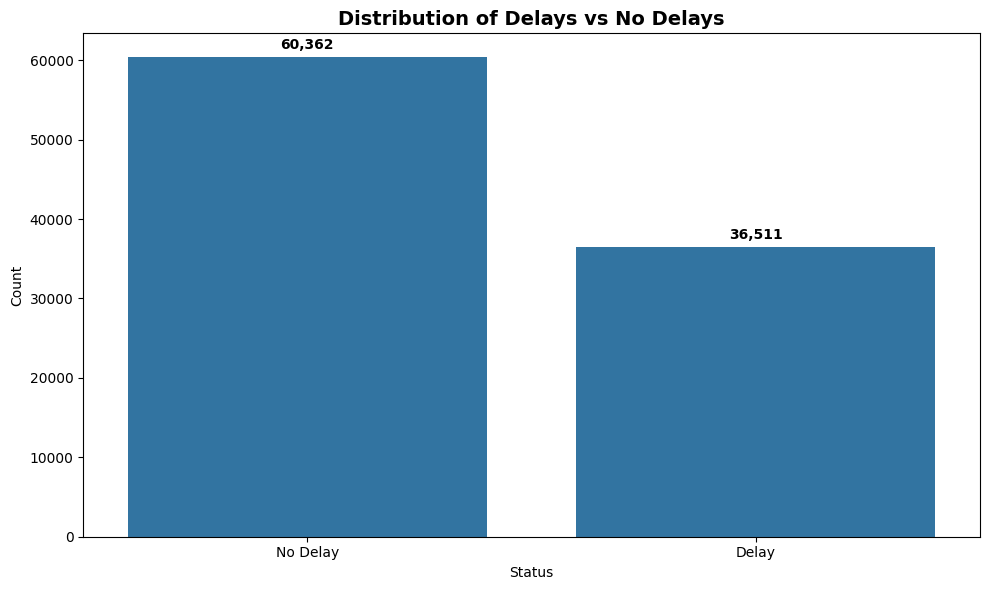

In [31]:
# Distribution of Delays vs No Delays
plt.figure(figsize=(10, 6))
delay_counts = subway_df['HasDelay'].value_counts()
sns.barplot(x=['No Delay', 'Delay'], y=delay_counts.values)
plt.title('Distribution of Delays vs No Delays', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Status')
for i, v in enumerate(delay_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/delay_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

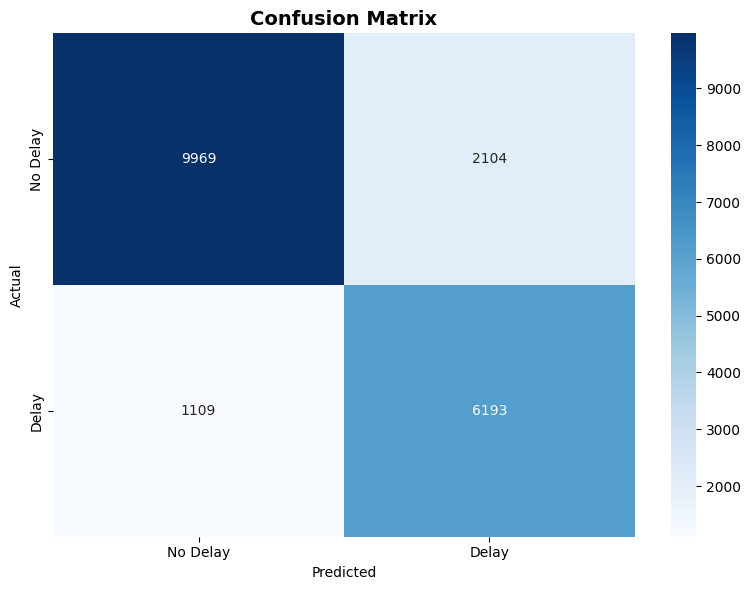


True Negatives (Correct No Delay): 9,969
False Positives (Predicted Delay, Actually No Delay): 2,104
False Negatives (Predicted No Delay, Actually Delay): 1,109
True Positives (Correct Delay): 6,193


In [32]:
# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Delay', 'Delay'],
            yticklabels=['No Delay', 'Delay'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('../visualizations/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTrue Negatives (Correct No Delay): {cm[0,0]:,}")
print(f"False Positives (Predicted Delay, Actually No Delay): {cm[0,1]:,}")
print(f"False Negatives (Predicted No Delay, Actually Delay): {cm[1,0]:,}")
print(f"True Positives (Correct Delay): {cm[1,1]:,}")

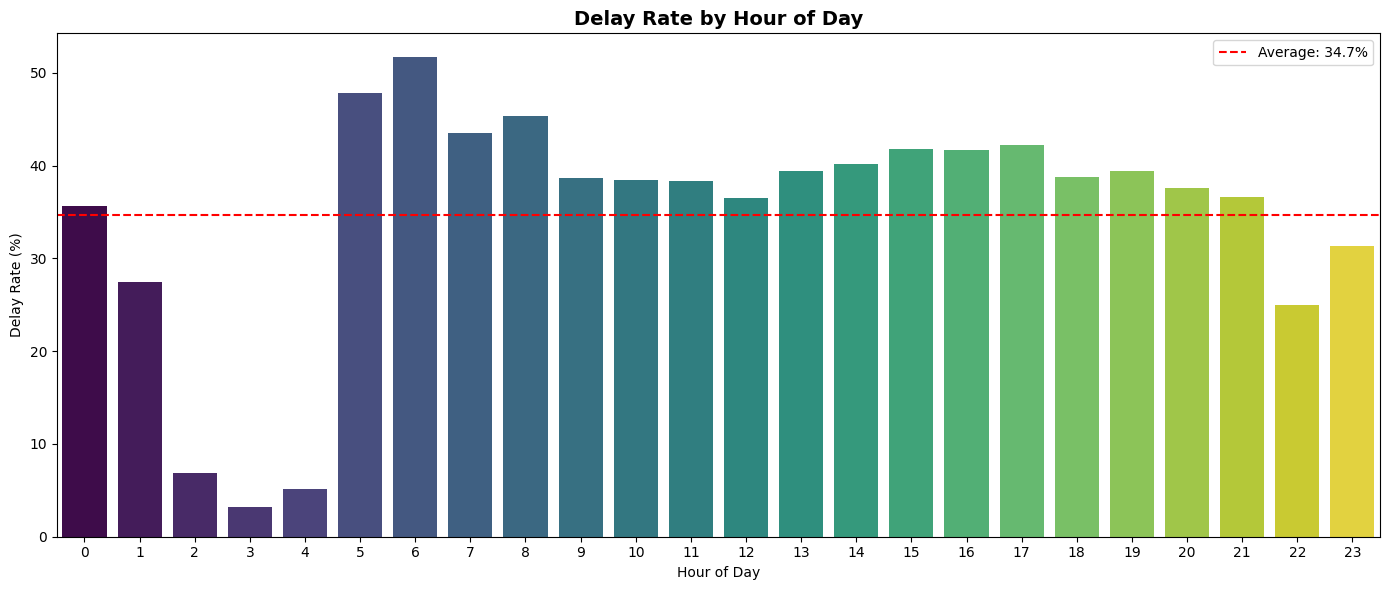

In [33]:
# Delay Rate by Hour of Day
plt.figure(figsize=(14, 6))
hourly_delay_rate = subway_df.groupby('Hour')['HasDelay'].mean() * 100
sns.barplot(x=hourly_delay_rate.index, y=hourly_delay_rate.values, hue=hourly_delay_rate.index, palette='viridis', legend=False)
plt.title('Delay Rate by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Delay Rate (%)')
plt.xticks(range(0, 24))
plt.axhline(y=hourly_delay_rate.mean(), color='r', linestyle='--', label=f'Average: {hourly_delay_rate.mean():.1f}%')
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/hourly_delay_rate.png', dpi=300, bbox_inches='tight')
plt.show()